<a href="https://colab.research.google.com/github/DongyounKim/Coms599_ML_demo/blob/main/402C_demo_Dongyoun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic concepts

References:

[1] https://towardsdatascience.com/the-definitive-perceptron-guide-fd384eb93382#3213

[2] https://github.com/CSCfi/machine-learning-scripts/

In [1]:
from tqdm import tqdm

## 1. perceptron

[1 1] [3 1] [3 3] [1 3]


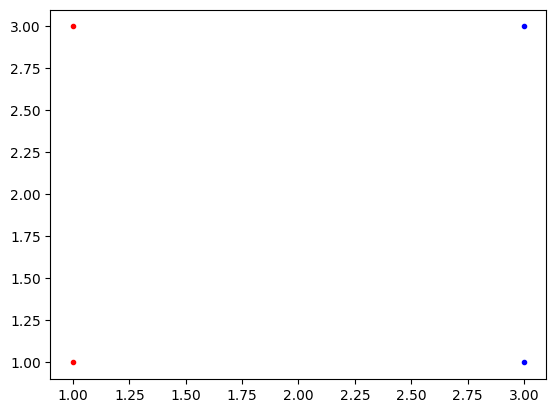

Perceptron()

In [2]:
# perceptron

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

X = np.array([[1, 1], [3, 1], [3, 3], [1, 3]])
y = np.array([0, 0, 1, 1])

print(X[0],X[1],X[2],X[3])
plt.plot(X[0],X[1], '.r')
plt.plot(X[2],X[3], '.b')
plt.show()

# Model definition
perceptron = Perceptron(max_iter=1000)
#Fitting - learning
perceptron.fit(X, y)

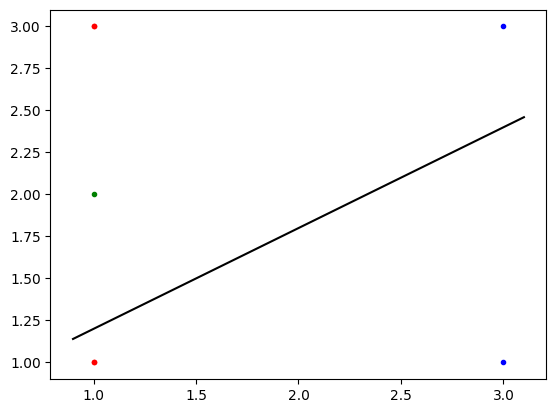

prediction is  [1]


In [3]:
# Inference with a new data point
new_data_point = np.array([[1, 2]])
prediction = perceptron.predict(new_data_point)
plt.plot(X[0],X[1], '.r')
plt.plot(X[2],X[3], '.b')
plt.plot(X[0],X[1], '.r')
plt.plot(new_data_point[0][0],new_data_point[0][1], '.g')

# SHow the hyperline
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()

# Calc the hyperplane (decision boundary)
xmin, xmax = plt.xlim()
w = perceptron.coef_[0]
#print(w)
a = -w[0] / w[1]
#print(a)
xx = np.linspace(xmin, xmax)
yy = a * xx - (perceptron.intercept_[0]) / w[1]
# Plot the hyperplane
plt.plot(xx, yy, 'k-')
plt.show()
plt.show()
print("prediction is ", prediction)

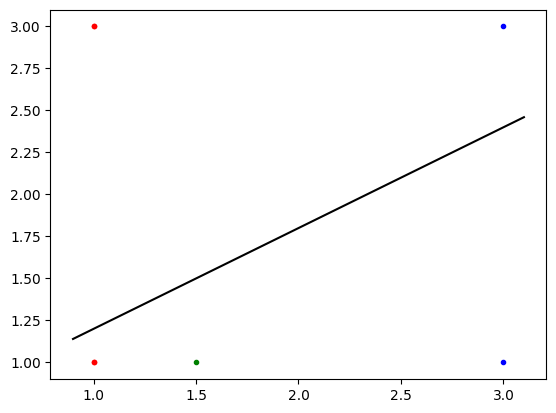

[0]


In [4]:
# Inference with a new data point
new_data_point = np.array([[1.5, 1]])
prediction = perceptron.predict(new_data_point)
plt.plot(X[0],X[1], '.r')
plt.plot(X[2],X[3], '.b')
plt.plot(X[0],X[1], '.r')
plt.plot(new_data_point[0][0],new_data_point[0][1], '.g')

# SHow the hyperline
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()

# Calc the hyperplane (decision boundary)
xmin, xmax = plt.xlim()
w = perceptron.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xmin, xmax)
yy = a * xx - (perceptron.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy, 'k-')
plt.show()
print(prediction)

#2. MLP and CNN


## 1. Mnist Dataset Load

references: https://github.com/CSCfi/machine-learning-scripts/blob/master/notebooks/pytorch-mnist-mlp.ipynb

In [46]:
import torch
import torchvision.datasets as dataset
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

# MNIST Dataset
train_dataset = dataset.MNIST(root='./data',
                            train=True,
                            transform=ToTensor(),
                            download=True)

test_dataset = dataset.MNIST(root='./data',
                           train=False,
                           transform=ToTensor())

# Data Loader (Input Pipeline)
## which is used for processing the dataset in batches in an efficient manner
train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

data: torch.Size([100, 1, 28, 28]) type: torch.FloatTensor
target: torch.Size([100]) type: torch.LongTensor


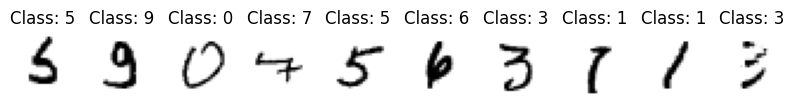

In [6]:
import matplotlib.pyplot as plt
for (data, target) in train_loader:
    print('data:', data.size(), 'type:', data.type())
    print('target:', target.size(), 'type:', target.type())
    break
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(data[i,:,:,:].numpy().reshape(28,28), cmap="gray_r")
    plt.title('Class: '+str(target[i].item()))

## Multi-layer perceptron (MLP) network

In [7]:
# Deep Neural Network Model
import torch.nn as nn


class MLP(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(), #input
            nn.Linear(input_size, 64), # 1st hidden states
            nn.ReLU(),
            nn.Linear(64, 32), # 2nd hidden states
            nn.ReLU(),
            nn.Linear(32, num_classes) #input, class_num
            ## Softmax layer ignored since the loss function defined is nn.CrossEntropy()
        )

    def forward(self, x):
        #out = self.flatten(x)
        logits = self.layers(x)
        return logits


# Neurons of each layer
input_size = 784
num_classes = 10

# Initialization
device = "cuda" if torch.cuda.is_available() else "cpu"
mlp_model = MLP(input_size, num_classes).to(device)
print(mlp_model)

MLP(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=10, bias=True)
  )
)


## Training the model
For a classification task we typically use the cross entropy loss. For this we can use the class CrossEntropyLoss.

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp_model.parameters())

In [58]:
def correct(output, target):
    predicted_digits = output.argmax(1)                            # pick digit with largest network output
    correct_ones = (predicted_digits == target).type(torch.float)  # 1.0 for correct, 0.0 for incorrect
    return correct_ones.sum().item()                               # count number of correct ones

In [10]:
def train(data_loader, model, criterion, optimizer):
    model.train()

    num_batches = len(data_loader)
    num_items = len(data_loader.dataset)

    total_loss = 0
    total_correct = 0
    for data, target in data_loader:
        # Copy data and targets to GPU
        data = data.to(device)
        target = target.to(device)

        # Do a forward pass
        output = model(data)

        # Calculate the loss
        loss = criterion(output, target)
        total_loss += loss

        # Count number of correct digits
        total_correct += correct(output, target)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    train_loss = total_loss/num_batches
    accuracy = total_correct/num_items
    print(f"Average loss: {train_loss:7f}, accuracy: {accuracy:.2%}")

In [11]:
%%time

epochs = 5
for epoch in range(epochs):
    print(f"Training epoch: {epoch+1}")
    train(train_loader, mlp_model, criterion, optimizer)

Training epoch: 1
Average loss: 0.465405, accuracy: 86.73%
Training epoch: 2
Average loss: 0.209423, accuracy: 93.89%
Training epoch: 3
Average loss: 0.161549, accuracy: 95.29%
Training epoch: 4
Average loss: 0.130114, accuracy: 96.19%
Training epoch: 5
Average loss: 0.108344, accuracy: 96.75%
CPU times: user 38.8 s, sys: 480 ms, total: 39.3 s
Wall time: 39 s


## Inference

In [12]:
def test(test_loader, model, criterion):
    model.eval()

    num_batches = len(test_loader)
    num_items = len(test_loader.dataset)

    test_loss = 0
    total_correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            # Copy data and targets to GPU
            data = data.to(device)
            target = target.to(device)

            # Do a forward pass
            output = model(data)

            # Calculate the loss
            loss = criterion(output, target)
            test_loss += loss.item()

            # Count number of correct digits
            total_correct += correct(output, target)

    test_loss = test_loss/num_batches
    accuracy = total_correct/num_items

    print(f"Testset accuracy: {100*accuracy:>0.1f}%, average loss: {test_loss:>7f}")

In [13]:
test(test_loader, mlp_model, criterion)

Testset accuracy: 96.3%, average loss: 0.118014


## Task: Model with two hidden layers
* 1st hidden layer: 300 units
* 2nd hidden layer: 100 units
* Activation function: nn.Tanh()

In [14]:
class OwnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            ## ADD layer!!!
            nn.Flatten(), #input
            nn.Linear(input_size, 64), # 1st hidden states
            nn.ReLU(), # Activation
            nn.Linear(64, 32), # 2nd hidden states
            nn.ReLU(), # Activation
            nn.Linear(32, num_classes) #input, class_num
            ## Softmax layer ignored since the loss function defined is nn.CrossEntropy()
        )

    def forward(self, x):
        return self.layers(x)

### Task: Training with own model

In [15]:
ex1_model = OwnModel()
ex1_model.to(device)
ex1_criterion = nn.CrossEntropyLoss()
ex1_optimizer = torch.optim.Adam(ex1_model.parameters())

In [16]:
%%time
epochs = 5
for epoch in range(epochs):
    print(f"Epoch: {epoch+1} ...")
    train(train_loader, ex1_model, ex1_criterion, ex1_optimizer)

Epoch: 1 ...
Average loss: 0.469222, accuracy: 87.28%
Epoch: 2 ...
Average loss: 0.204407, accuracy: 94.05%
Epoch: 3 ...
Average loss: 0.153816, accuracy: 95.53%
Epoch: 4 ...
Average loss: 0.123529, accuracy: 96.34%
Epoch: 5 ...
Average loss: 0.102052, accuracy: 97.01%
CPU times: user 37 s, sys: 228 ms, total: 37.2 s
Wall time: 37 s


## Convolution Neural Network


In [17]:
'''
Already Load Datasets
'''

'\nAlready Load Datasets\n'

In [18]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential( #the input to Conv2d will be 1x28x28 as the images have a single color channel (gray scale) and have a width by height of 28x28
            nn.Conv2d(1, 32, kernel_size=3, padding='valid'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(32*13*13, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.layers(x)

cnn_model = SimpleCNN().to(device)
print(cnn_model)

SimpleCNN(
  (layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=valid)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Flatten(start_dim=1, end_dim=-1)
    (4): Linear(in_features=5408, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters())

In [20]:
%%time
epochs = 5
for epoch in range(epochs):
    print(f"Training epoch: {epoch+1}")
    train(train_loader, cnn_model, criterion, optimizer)

Training epoch: 1
Average loss: 0.254021, accuracy: 92.62%
Training epoch: 2
Average loss: 0.081486, accuracy: 97.64%
Training epoch: 3
Average loss: 0.053309, accuracy: 98.46%
Training epoch: 4
Average loss: 0.037400, accuracy: 98.89%
Training epoch: 5
Average loss: 0.028995, accuracy: 99.10%
CPU times: user 37.4 s, sys: 268 ms, total: 37.7 s
Wall time: 37.4 s


In [21]:
test(test_loader, cnn_model, criterion)

Testset accuracy: 98.6%, average loss: 0.040432


## Tasks 2: complex CNN model

Your task is to try the same problem as above, but with two convolutional layers. The new model should have the following layers in order:

<Later>
* Convolutional (Conv2d) layer with 32 units and 3x3 kernels, valid padding + ReLU activation
* Another identical convolutional layer + ReLU activation
* Max pooling (MaxPool2d) layer with 2x2 pooling size
* Dropout with 0.25 rate
* Flatten
* Dense layer with 128 units
* Dropout with 0.5 rate
* Dense output layer with 10 units

In [54]:
class ComplexCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
           # TASK 1: ADD LAYERS HERE
           nn.Conv2d(1, 32, kernel_size=3, padding='valid'),
           nn.ReLU(),
           nn.Conv2d(32, 32, kernel_size=3, padding='valid'),
           nn.ReLU(),
           nn.MaxPool2d(kernel_size=2),
           nn.Dropout(0.25),
           nn.Flatten(),
           nn.Linear(12*12*32, 128),
           nn.ReLU(),
           nn.Dropout(0.5),
           nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.layers(x)

In [55]:
ex2_model = ComplexCNN()
ex2_model.to(device)
print(ex2_model)

ComplexCNN(
  (layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=valid)
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=valid)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.25, inplace=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=4608, out_features=128, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.5, inplace=False)
    (10): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [56]:
ex2_criterion = nn.CrossEntropyLoss()
ex2_optimizer = torch.optim.Adam(ex2_model.parameters())

In [59]:
%%time

epochs = 5
for epoch in range(epochs):
    print(f"Epoch: {epoch+1} ...")
    train(train_loader, ex2_model, ex2_criterion, ex2_optimizer)

Epoch: 1 ...


100%|██████████| 600/600 [00:08<00:00, 74.92it/s]


Average loss: 0.294107, accuracy: 91.04%
Epoch: 2 ...


100%|██████████| 600/600 [00:07<00:00, 75.70it/s]


Average loss: 0.107471, accuracy: 96.91%
Epoch: 3 ...


100%|██████████| 600/600 [00:07<00:00, 76.42it/s]


Average loss: 0.080090, accuracy: 97.61%
Epoch: 4 ...


100%|██████████| 600/600 [00:07<00:00, 75.07it/s]


Average loss: 0.068621, accuracy: 97.97%
Epoch: 5 ...


100%|██████████| 600/600 [00:08<00:00, 74.28it/s]

Average loss: 0.057001, accuracy: 98.23%
CPU times: user 40 s, sys: 343 ms, total: 40.3 s
Wall time: 39.9 s


In [26]:
test(test_loader, ex1_model, ex1_criterion)

Testset accuracy: 96.7%, average loss: 0.109728


# RNN

## Simple sentiment classification with RNNs
## dataset download



In [27]:
!pip install 'portalocker>=2.0.0'

In [28]:
from torchtext import datasets
data_dir = './data'
print('data_dir =', data_dir)

train_dataset, test_dataset = datasets.IMDB(data_dir, split=('train', 'test'))

data_dir = ./data


In [29]:
def count_labels(dataset):
    counts={}
    i=0
    for label, text in dataset:
        if label not in counts:
            counts[label] = 1
        else:
            counts[label] += 1
    for key, value in counts.items():
        print(f"label: {key}, count: {value}")

print('train')
count_labels(train_dataset)

print('test')
count_labels(test_dataset)

train
label: 1, count: 12500
label: 2, count: 12500
test
label: 1, count: 12500
label: 2, count: 12500


In [30]:
for label, text in train_dataset:
    print("First review in the training set:")
    print(text)
    print("Label:", label)
    break

First review in the training set:
I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity s

## Pre-processing
To achieve this we will:

* Create a "vocabulary", that is a mapping from each word to a unique number assigned to that word
* Convert sentences to lists of integers using the vocabulary
* Make fixed-length vectors out of the lists of integers by truncating too long lists, and padding too shorts ones with zeros

In [31]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

# number of most-frequent words to use
nb_words = 10000

tokenizer = get_tokenizer("basic_english")

def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_dataset),
                                  specials=["<unk>"], max_tokens=nb_words)
vocab.set_default_index(vocab["<unk>"])

In [32]:
for word in ['hello', 'the', 'recurrent', '<unk>']:
    print(word, "->", vocab[word])

hello -> 4644
the -> 1
recurrent -> 0
<unk> -> 0


In [33]:
#PyTorch DataPipes to map the sentences to fixed-length vectors. We'll use a vector length of 80.
import torchtext.transforms as T
maxlen = 80

patterns_list = [
    (r'"', '')
]

patterns_list = [
    (r'[,._+ ]+', r' ')
]

text_transform = T.Sequential(
    T.RegexTokenizer(patterns_list),  # Split sentences into words
    T.VocabTransform(vocab),          # Transform from words to integers
    T.Truncate(maxlen),               # Truncate (shorten) too long lists
    T.ToTensor(),                     # Transform to PyTorch tensors
    T.PadTransform(maxlen, 0),        # Pad too short lists with zeros
)

In [34]:
text_transform("hello, this is a test sentence")

tensor([4644,   13,    9,    5, 2150, 4324,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])

In [35]:
# Apply the list of transforms to the text
# We also switch around so we have the text first and labels second
# Finally we subtract 1 from the label so that 0=negative and 1=positive review
def apply_transform(x):
    return text_transform(x[1]), torch.tensor(x[0]-1, dtype=torch.float)


train_dataset_tr = train_dataset.map(apply_transform)
test_dataset_tr = test_dataset.map(apply_transform)

In [36]:
batch_size = 128

train_loader = DataLoader(dataset=train_dataset_tr, batch_size=batch_size, shuffle=True,
                          drop_last=True)
test_loader = DataLoader(dataset=test_dataset_tr, batch_size=batch_size, shuffle=False,
                         drop_last=True)

## RNN model
Let's create an RNN model that contains an LSTM layer. The first layer in the network is an embedding layer that converts integer indices to dense vectors of length embedding_dims. The output layer contains a single neuron and sigmoid non-linearity to match the binary groundtruth (0=negative, 1=positive review).

In [37]:
# model parameters:
embedding_dims = 50
lstm_units = 32

class SimpleRNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.emb = nn.Embedding(nb_words, embedding_dims)
        self.dropout = nn.Dropout(0.2)
        self.lstm = nn.LSTM(embedding_dims, lstm_units, batch_first=True)
        self.linear = nn.Linear(lstm_units, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.emb(x)
        x = self.dropout(x)
        x, (hn, cn) = self.lstm(x)    # LSTM also returns the values of the internal h_n and c_n parameters
        x = self.linear(x[:, -1, :])  # we pick only the last output after having processed the whole sequence
        return self.sigmoid(x.view(-1))

model = SimpleRNN().to(device)
print(model)

SimpleRNN(
  (emb): Embedding(10000, 50)
  (dropout): Dropout(p=0.2, inplace=False)
  (lstm): LSTM(50, 32, batch_first=True)
  (linear): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


## Learning

In [38]:
def correct(output, target):
    sentiment_pred = output.round().int()          # set to 0 for <0.5 and 1 for >0.5
    correct_ones = sentiment_pred == target.int()  # 1 for correct, 0 for incorrect
    return correct_ones.sum().item()               # count number of correct ones

In [39]:
def train(data_loader, model, criterion, optimizer):
    model.train()

    num_batches = 0
    num_items = 0

    total_loss = 0
    total_correct = 0
    for data, target in tqdm(data_loader):
        # Copy data and targets to GPU
        data = data.to(device)
        target = target.to(device)

        # Do a forward pass
        output = model(data)

        # Calculate the loss
        loss = criterion(output, target)
        total_loss += loss
        num_batches += 1

        # Count number of correct digits
        total_correct += correct(output, target)
        num_items += len(target)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    train_loss = total_loss/num_batches
    accuracy = total_correct/num_items
    print(f"Average loss: {train_loss:7f}, accuracy: {accuracy:.2%}")

In [40]:
criterion = nn.BCELoss() #Binary cross-entropy loss
optimizer = torch.optim.RMSprop(model.parameters())

In [41]:
%%time
epochs = 5
for epoch in range(epochs):
    print(f"Training epoch: {epoch+1}")
    train(train_loader, model, criterion, optimizer)

Training epoch: 1


195it [00:09, 20.83it/s]


Average loss: 0.543415, accuracy: 71.98%
Training epoch: 2


195it [00:09, 20.25it/s]


Average loss: 0.528536, accuracy: 72.98%
Training epoch: 3


195it [00:08, 22.56it/s]


Average loss: 0.431036, accuracy: 80.53%
Training epoch: 4


195it [00:08, 22.58it/s]


Average loss: 0.369523, accuracy: 84.04%
Training epoch: 5


195it [00:08, 21.97it/s]

Average loss: 0.323454, accuracy: 86.07%
CPU times: user 44.8 s, sys: 632 ms, total: 45.4 s
Wall time: 45.2 s


## Inference

In [42]:
def test(test_loader, model, criterion):
    model.eval()

    num_batches = 0
    num_items = 0

    test_loss = 0
    total_correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            # Copy data and targets to GPU
            data = data.to(device)
            target = target.to(device)

            # Do a forward pass
            output = model(data)

            # Calculate the loss
            loss = criterion(output, target)
            test_loss += loss.item()
            num_batches += 1

            # Count number of correct digits
            total_correct += correct(output, target)
            num_items += len(target)

    test_loss = test_loss/num_batches
    accuracy = total_correct/num_items

    print(f"Testset accuracy: {100*accuracy:>0.1f}%, average loss: {test_loss:>7f}")

In [43]:
test(test_loader, model, criterion)

Testset accuracy: 75.8%, average loss: 0.535613


In [44]:
#myreviewtext = 'this movie was the worst i have ever seen and the actors were horrible'
myreviewtext = 'this movie was awesome and then best action I have ever seen'

input = text_transform(myreviewtext).view(1, -1).to(device)
print(input)
p = model(input).item()
sentiment = "POSITIVE" if p > 0.5 else "NEGATIVE"
print(f'Predicted sentiment: {sentiment} ({p:.4f})')

tensor([[  13,   20,   16, 1153,    4,  100,  123,  224,    0,   32,  130,  116,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]], device='cuda:0')
Predicted sentiment: POSITIVE (0.8997)
